Experiment with hierarchal clustering and gaussian mixture models

# Agglomerative Clustering

### Setup

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture

tsne_perplexity = 40
seed = 42


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [2]:
iris = load_iris()
X = iris.data

## Find "Optimal" Clusters

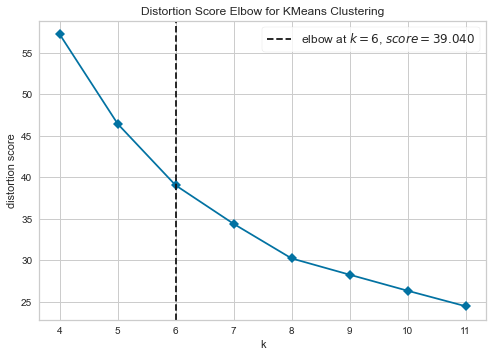

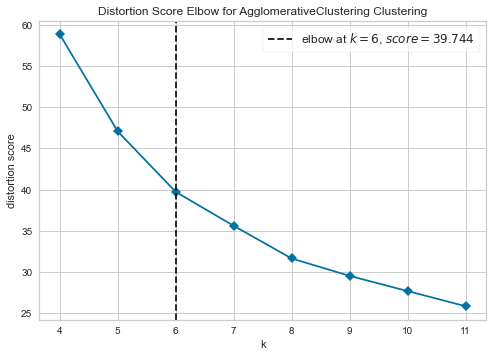

In [3]:
# Find optimal number of  clusters with different algorithmns

# doesn't work for GaussianMixture since it isn't considered a clustering algo

kmeans_viz = KElbowVisualizer(
    KMeans(), k=(4,12), timings=False
)
kmeans_viz.fit(X)
kmeans_viz.show()

agg_viz = KElbowVisualizer(
    AgglomerativeClustering(), k=(4,12), timings=False
)
agg_viz.fit(X)
agg_viz.show()

### Sklearn 
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

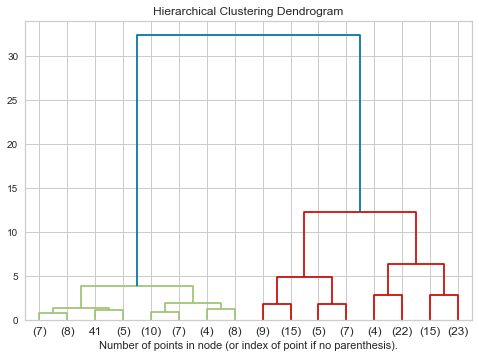

In [4]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### Scipy

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# generate the linkage matrix
Z = linkage(X, 'ward')

# Cophenetic Correlation Coefficient 
c, coph_dists = cophenet(Z, pdist(X))

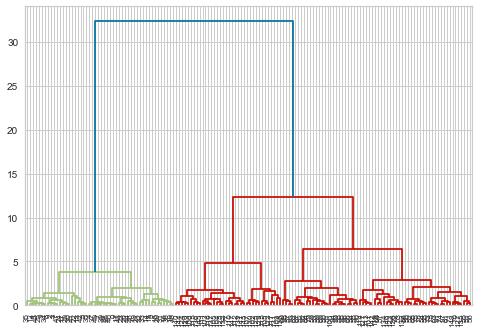

In [6]:
# Plot full dendrogram
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

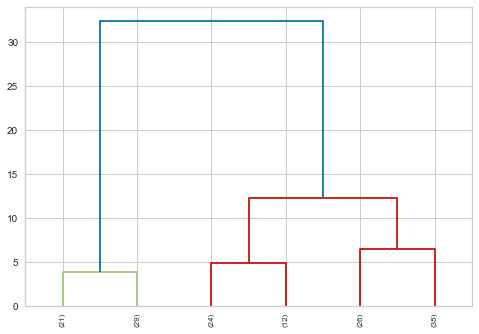

In [7]:
# Plot truncated dendrogram
dendrogram(
    Z,
    truncate_mode = 'lastp',  # show only the last p merged clusters
    p = 6,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### Predict clusters

In [8]:
from scipy.cluster.hierarchy import fcluster

# Specify max distance
fcluster(Z, 10, criterion = 'distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [9]:
# specify number of clusters
agg_pred  = fcluster(Z, 6, criterion = 'maxclust')

# Gaussian Mixture Models

- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
- https://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture

In [44]:
# Covariance  type = 'full' let's us fit oblong clusters
gmm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state = 235)
gmm.fit(X)

GaussianMixture(n_components=6, random_state=235)

In [45]:
gmm_pred = gmm.predict(X)

### KNN

In [12]:
knn = KMeans(n_clusters = 6, random_state = seed)
knn.fit(X)

knn_pred = knn.predict(X)

# TNSE  Visuals
Have to reduce 4 dimensions of the iris dataset to 2 for plotting

In [13]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

In [33]:
tsne = TSNE(n_components = 2, perplexity = tsne_perplexity, random_state = seed)

tsne_df = pd.DataFrame(tsne.fit_transform(X))

In [34]:
tsne_df['gmm_clust'] = pd.Categorical(gmm_pred)
tsne_df['agg_clust'] = pd.Categorical(agg_pred)
tsne_df['knn_clust'] = pd.Categorical(knn_pred)

In [35]:
tsne_df.columns

Index([0, 1, 'gmm_clust', 'agg_clust', 'knn_clust'], dtype='object')

In [36]:
tsne_df['gmm_clust'].value_counts()

1    35
0    35
3    31
5    24
2    15
4    10
Name: gmm_clust, dtype: int64

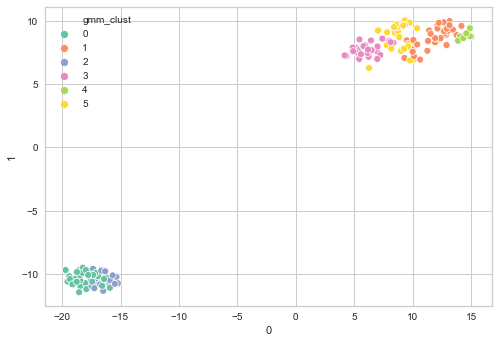

In [53]:
sns.scatterplot(data = tsne_df, x = 0, y = 1, hue = 'gmm_clust',
               alpha = 1, palette="Set2", legend = 'full')

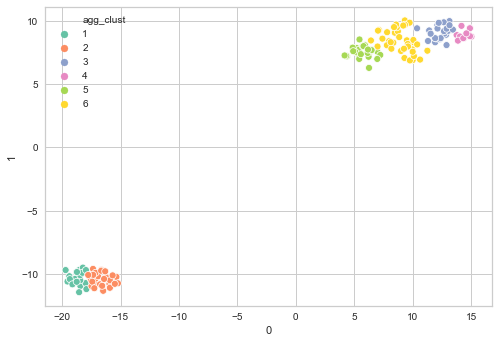

In [38]:
sns.scatterplot(data = tsne_df, x = 0, y = 1, hue = 'agg_clust',
               alpha = 1, palette = "Set2", legend = 'full')

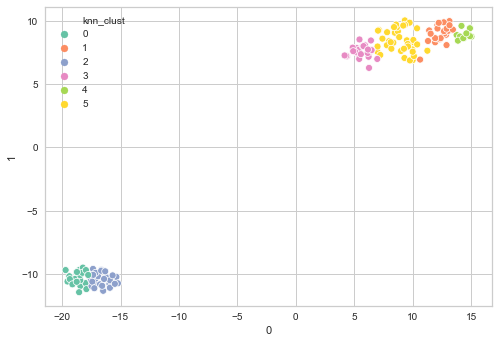

In [39]:
sns.scatterplot(data = tsne_df, x = 0, y = 1, hue = 'knn_clust',
               alpha = 1, palette="Set2", legend = 'full')

# GMM Analysis
Look at the optimum number of clusters according to BIC and AIC

In [21]:
import matplotlib.pyplot as plt

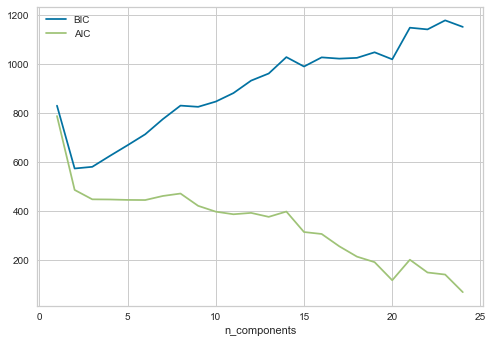

In [51]:
n_components = np.arange(1, 25)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');